# Episode 7 - Basic MNIST with tf.contrib.learn

This code is tested against TensorFlow 0.10.0rc0. You can find a docker image here: https://hub.docker.com/r/tensorflow/tensorflow/

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [6]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [7]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [8]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

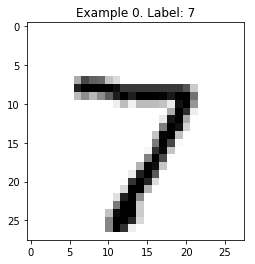

In [9]:
display(0)

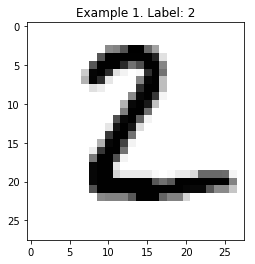

In [10]:
display(1)

These digits are clearly drawn. Here's one that's not.

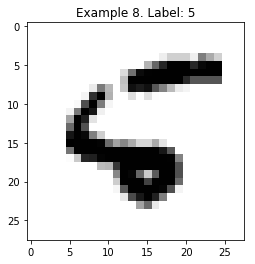

In [11]:
display(8)

Now let's take a look at how many features we have.

In [12]:
print len(data[0])

SyntaxError: invalid syntax (<ipython-input-12-b5cf9bc9f27e>, line 1)

## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier. For more details on how these work, see https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [13]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1339a5e48>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## Evaluate accuracy

In [14]:
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

SyntaxError: invalid syntax (<ipython-input-14-2e1f1e4ff480>, line 2)

## Classify a few examples

We can make predictions on individual images using the predict method

In [15]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0354ba381638>", line 2, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 539, in predict
    as_iterable=as_iterable)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 574, in predict_classes
    as_iterable=as_iterable)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 670, in predict
    iterate_batches=iterate_batches)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 974, in _infer_model
    config=self._session_config))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 826, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 549, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 1012, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 1017, in _create_session
    return self._sess_creator.create_session()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 706, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 468, in create_session
    self._scaffold.finalize()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 212, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 856, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1284, in __init__
    self.build()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 775, in _build_internal
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 453, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 400, in _AddRestoreOps
    restore_sequentially)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 832, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [16]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-3a89add2bd61>", line 2, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 539, in predict
    as_iterable=as_iterable)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 574, in predict_classes
    as_iterable=as_iterable)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 670, in predict
    iterate_batches=iterate_batches)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 974, in _infer_model
    config=self._session_config))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 826, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 549, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 1012, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 1017, in _create_session
    return self._sess_creator.create_session()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 706, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 468, in create_session
    self._scaffold.finalize()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 212, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 856, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1284, in __init__
    self.build()
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 775, in _build_internal
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 453, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 400, in _AddRestoreOps
    restore_sequentially)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 832, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

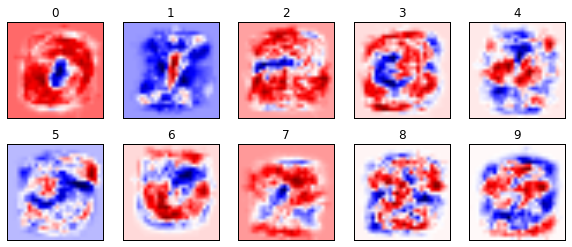

In [14]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

# Next steps

* TensorFlow Docker images: https://hub.docker.com/r/tensorflow/tensorflow/ 
* TF.Learn Quickstart: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html
* MNIST tutorial: https://www.tensorflow.org/tutorials/mnist/beginners/index.html
* Visualizating MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Additional notebooks: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/docker/notebooks
* More about linear classifiers: https://www.tensorflow.org/versions/r0.10/tutorials/linear/overview.html#large-scale-linear-models-with-tensorflow
* Much more about linear classifiers: http://cs231n.github.io/linear-classify/
* Additional TF.Learn samples: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow